In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
train=pd.read_csv('train_data.txt', sep=':::', names=['Id', 'Title','Genre', 'Description'])
test=pd.read_csv('test_data.txt', sep=':::', names=['Id', 'Title','Genre', 'Description'])
test_solution=pd.read_csv('test_data_solution.txt', sep=':::', names=['Id', 'Title','Genre', 'Description'])

/var/folders/j0/010hmlw122zfxdhtm_llx0c40000gn/T/ipykernel_6659/1389796368.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train=pd.read_csv('train_data.txt', sep=':::', names=['Id', 'Title','Genre', 'Description'])
/var/folders/j0/010hmlw122zfxdhtm_llx0c40000gn/T/ipykernel_6659/1389796368.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test=pd.read_csv('test_data.txt', sep=':::', names=['Id', 'Title','Genre', 'Description'])
/var/folders/j0/010hmlw122zfxdhtm_llx0c40000gn/T/ipykernel_6659/1389796368.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support 

In [5]:
train.head()

,Id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [6]:
test.head()

,Id,Title,Genre,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


In [7]:
test_solution.head()

,Id,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [34]:
Top_Genre=train['Genre'].value_counts()
Top_Genre

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

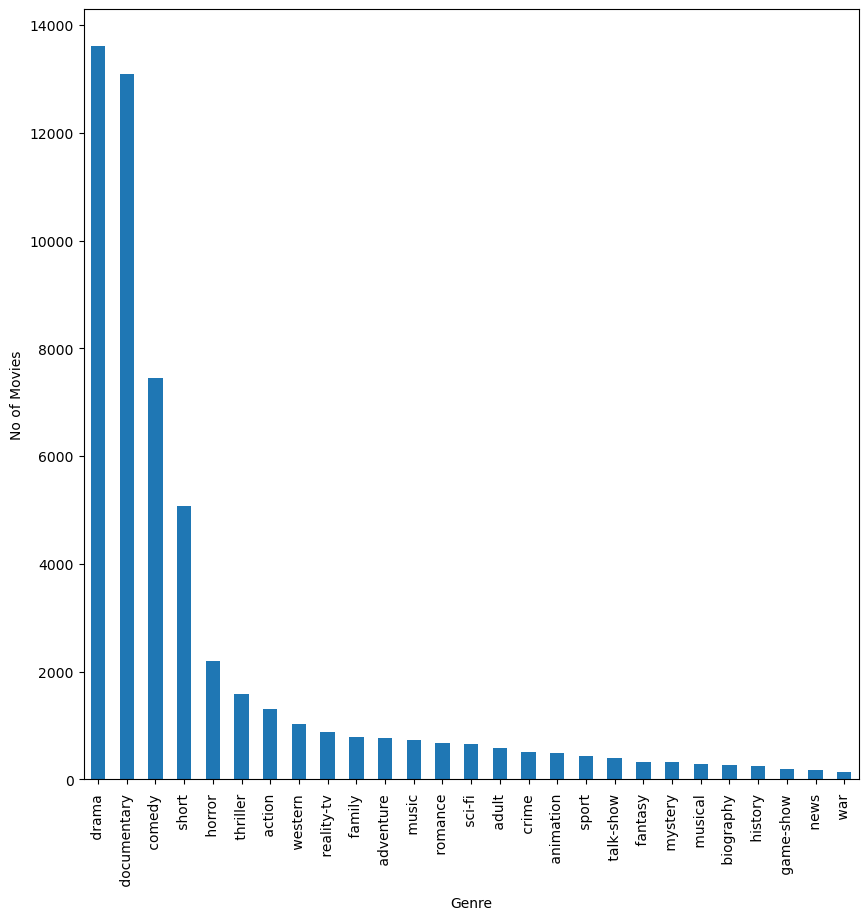

In [61]:
plt.figure(figsize=(10,10))
Top_Genre.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('No of Movies')
plt.show()

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

In [42]:
train['Description'].fillna("", inplace=True)
test['Description'].fillna("", inplace=True)

t_v= TfidfVectorizer(stop_words='english', max_features=100000)
X_train= t_v.fit_transform(train['Description'])
X_test= t_v.transform(test['Description'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train['Genre'])
y_test = label_encoder.transform(test_solution['Genre'])

In [45]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

z = LinearSVC()
z.fit(X_train_sub, y_train_sub)

y_val_pred = z.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val,y_val_pred) )

/Users/gowtham/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Validation Accuracy: 0.5836945494789265
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.32      0.37       263
           1       0.74      0.44      0.55       112
           2       0.45      0.21      0.28       139
           3       0.47      0.15      0.23       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.72      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.13      0.03      0.04        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.65      0.66      0.66       431
          14       0.61      0.53      0.57       144
          15       0.25      0.04      0.07        50
      

In [46]:
y_pred = z.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.09357933579335793
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.00      0.00      0.00     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16     

/Users/gowtham/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gowtham/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gowtham/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
from sklearn.linear_model import LogisticRegression
Log_classifier = LogisticRegression(max_iter=600)
Log_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=600)

In [58]:
def prediction(Description):
    t_v1=t_v.transform([Description])
    pred_label=z.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

In [57]:
sample='A movie where Lord Rama kills Ravanasura and protects Sita Maa and based on Ramanayam'
print(prediction(sample))

 fantasy 


In [59]:
sample='A movie where Avengers fight against thanos with the help of 6 infinity stones and save the universe'
print(prediction(sample))

 drama 
